# 🧪 Lab 7: Feature Engineering and Selection with Housing Price Data

**Objective**: Transform raw features, encode categorical variables, and select the most predictive features for housing price prediction.

**Theory**:
- Feature engineering creates new variables or transforms existing ones to improve model performance.
- Feature selection identifies the most relevant inputs to reduce overfitting and improve interpretability.
- Techniques include one-hot encoding, log transformations, correlation analysis, and model-based selection.

In [ ]:
# 📥 Step 1: Automatically download and load the dataset
import pandas as pd
url = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv"
df = pd.read_csv(url)
# df = pd.read_csv('sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 🧹 Step 2: Preprocess the data
- Drop irrelevant columns
- Handle missing values
- Encode categorical variables

In [ ]:
# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape
# df_encoded.head()

(20640, 13)

## 🔍 Step 3: Feature selection using correlation
We’ll examine correlation with the target variable (`SalePrice`) and drop weak predictors.

<Axes: title={'center': 'Top Correlated Features'}>

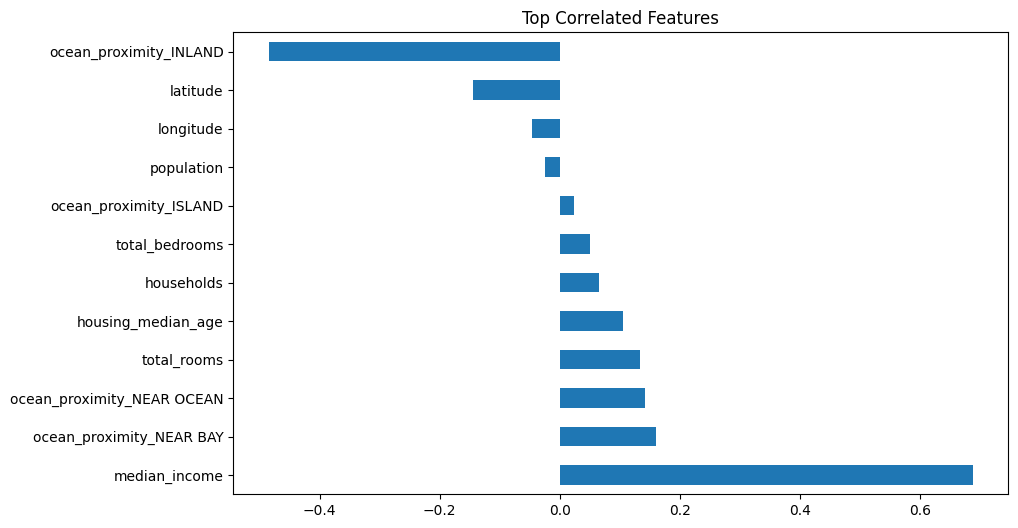

In [ ]:
# Correlation with SalePrice
corr = df_encoded.corr()['median_house_value'].sort_values(ascending=False)
top_features = corr[1:21]  # Top 20 features excluding SalePrice itself
top_features.plot(kind='barh', figsize=(10, 6), title="Top Correlated Features")

## 🧠 Step 4: Model-based feature selection
We’ll use a Random Forest to identify important features based on impurity reduction.

In [ ]:
#\

Selected features shape: (20640, 6)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## 📊 Step 5: Train a model with selected features
We’ll compare performance using selected features vs. all features.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sel_train, X_sel_test, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train models
lr_all = LinearRegression().fit(X_train, y_train)
lr_sel = LinearRegression().fit(X_sel_train, y_train)

# Evaluate
rmse_all = np.sqrt(mean_squared_error(y_test, lr_all.predict(X_test)))
rmse_sel = np.sqrt(mean_squared_error(y_test, lr_sel.predict(X_sel_test)))

print("RMSE with all features:", round(rmse_all, 2))
print("RMSE with selected features:", round(rmse_sel, 2))

RMSE with all features: 69792.02
RMSE with selected features: 73811.31


The RMSE (Root Mean Squared Error) is a measure of the average magnitude of the errors between predicted and actual values. A lower RMSE indicates a better-performing model.

    RMSE with all features: 69792.02
    RMSE with selected features: 73811.31

Comparing these two values, the model trained with all features has a slightly lower RMSE (69792.02) than the model trained with selected features (73811.31). This suggests that, in this particular case, removing features based on the SelectFromModel with a 'median' threshold actually led to a slight decrease in predictive accuracy. The features that were removed might have contributed some predictive power, even if individually they were less significant, or the threshold chosen was too aggressive.



### What is RMSE?

**Root Mean Squared Error (RMSE)** is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed. It represents the standard deviation of the residuals (prediction errors).

### Why is RMSE important?

1.  **Interpretability**: RMSE is directly interpretable in the same units as the response variable, which makes it easy to understand the magnitude of the prediction error.
2.  **Sensitivity to Large Errors**: Because the errors are squared before they are averaged, RMSE gives a relatively high weight to large errors. This means that RMSE is most useful when large errors are particularly undesirable.
3.  **Model Comparison**: It is widely used to compare the prediction accuracy of different models. A lower RMSE generally indicates a better fit of the model to the data.
4.  **Optimization Goal**: In many machine learning algorithms, minimizing RMSE (or MSE) is a common objective function during model training.

## 📝 Reflection Questions

1. Why is feature selection important for model performance?
2. How do correlation and model-based selection differ?
3. What risks arise from using too many features?
4. How could feature engineering improve predictions in business or health applications?